In [2]:
import sklearn
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from utils.dataset import get_sentences, get_corpora, get_top_author_gut_idx

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # surpress tensorflow warnings

# Acquire the dataset
First time this process takes around 10 minutes with fast internet connection.
Later the texts are taken from a local mysql cache and the process is much faster (~1m)`

In [3]:
corpora = get_corpora(max_chars_per_author = 1e7, random_seed=42)

Book 001 -- Acquiring Following the Equator: A Journey Around the World. Part 3 by Twain, Mark
Book 002 -- Acquiring Roughing It, Part 7. by Twain, Mark
Book 003 -- Acquiring The Prince and the Pauper, Part 1. by Twain, Mark
Book 004 -- Acquiring Sketches New and Old, Part 6. by Twain, Mark
Book 005 -- Acquiring Life on the Mississippi, Part 11. by Twain, Mark
Book 006 -- Acquiring Eve's Diary, Part 2 by Twain, Mark
Book 007 -- Acquiring A Double Barrelled Detective Story by Twain, Mark
Book 008 -- Acquiring On the Decay of the Art of Lying by Twain, Mark
Book 009 -- Acquiring Fenimore Cooper's Literary Offences by Twain, Mark
Book 010 -- Acquiring The Works of Mark Twain: An Index of all Project Gutenberg Editions by Twain, Mark
Book 011 -- Acquiring Life on the Mississippi, Part 10. by Twain, Mark
Book 012 -- Acquiring Life on the Mississippi, Part 4. by Twain, Mark
Book 013 -- Acquiring The Adventures of Tom Sawyer, Part 4. by Twain, Mark
Book 014 -- Acquiring Essays on Paul Bourget

Book 106 -- Acquiring The Right of Way — Volume 05 by Parker, Gilbert
Book 107 -- Acquiring Cumner's Son and Other South Sea Folk — Volume 02 by Parker, Gilbert
Book 108 -- Acquiring Carnac's Folly, Volume 3. by Parker, Gilbert
Book 109 -- Acquiring The Battle of the Strong: A Romance of Two Kingdoms — Volume 2 by Parker, Gilbert
Book 110 -- Acquiring Leila or, the Siege of Granada, Book V. by Lytton, Edward Bulwer Lytton, Baron
Book 111 -- Acquiring Alice, or the Mysteries — Book 10 by Lytton, Edward Bulwer Lytton, Baron
Book 112 -- Acquiring "My Novel" — Volume 11 by Lytton, Edward Bulwer Lytton, Baron
Book 113 -- Acquiring Godolphin, Volume 2. by Lytton, Edward Bulwer Lytton, Baron
Book 114 -- Acquiring The Caxtons: A Family Picture — Volume 02 by Lytton, Edward Bulwer Lytton, Baron
Book 115 -- Acquiring Harold : the Last of the Saxon Kings — Complete by Lytton, Edward Bulwer Lytton, Baron
Book 116 -- Acquiring Godolphin, Complete by Lytton, Edward Bulwer Lytton, Baron
Book 117 -- A

Book 211 -- Acquiring Diary of Samuel Pepys — Volume 16: May/June 1662 by Pepys, Samuel
Book 212 -- Acquiring Diary of Samuel Pepys — Volume 04: March/April 1659-1660 by Pepys, Samuel
Book 213 -- Acquiring Diary of Samuel Pepys — Complete 1667 N.S. by Pepys, Samuel
Book 214 -- Acquiring The Diary of Samuel Pepys — Complete by Pepys, Samuel
Book 215 -- Acquiring A Cousin's Conspiracy; Or, A Boy's Struggle for an Inheritance by Alger, Horatio, Jr.
Book 216 -- Acquiring Charlie Codman's Cruise: A Story for Boys by Alger, Horatio, Jr.
Book 217 -- Acquiring Luck and Pluck; or, John Oakley's Inheritance by Alger, Horatio, Jr.
Book 218 -- Acquiring Driven from Home; Or, Carl Crawford's Experience by Alger, Horatio, Jr.
Book 219 -- Acquiring A Boy's Fortune; Or, The Strange Adventures of Ben Baker by Alger, Horatio, Jr.
Book 220 -- Acquiring Index of the Project Gutenberg Works of Horatio Alger, Jr. by Alger, Horatio, Jr.
Book 221 -- Acquiring Brave and Bold; Or, The Fortunes of Robert Rushton

Book 308 -- Acquiring Dialstone Lane, Part 2. by Jacobs, W. W. (William Wymark)
Book 309 -- Acquiring Three at Table: The Lady of the Barge and Others, Part 12. by Jacobs, W. W. (William Wymark)
Book 310 -- Acquiring Many Cargoes by Jacobs, W. W. (William Wymark)
Book 311 -- Acquiring Captains All and Others by Jacobs, W. W. (William Wymark)
Book 312 -- Acquiring Ship's Company, the Entire Collection by Jacobs, W. W. (William Wymark)
Book 313 -- Acquiring Bob's Redemption: Captains All, Book 5. by Jacobs, W. W. (William Wymark)
Book 314 -- Acquiring Cupboard Love: The Lady of the Barge and Others, Part 5. by Jacobs, W. W. (William Wymark)
Book 315 -- Acquiring At Sunwich Port, Part 1.: Contents: Chapters 1-5 by Jacobs, W. W. (William Wymark)
Book 316 -- Acquiring Prize Money: Sailor's Knots, Part 10. by Jacobs, W. W. (William Wymark)
Book 317 -- Acquiring At Sunwich Port, Complete by Jacobs, W. W. (William Wymark)
Book 318 -- Acquiring The Convert: Deep Waters, Part 5. by Jacobs, W. W.

Book 397 -- Acquiring A Golden Venture: The Lady of the Barge and Others, Part 11. by Jacobs, W. W. (William Wymark)
Book 398 -- Acquiring Homeward Bound: Sailor's Knots, Part 2. by Jacobs, W. W. (William Wymark)
Book 399 -- Acquiring The Changing Numbers: Odd Craft, Part 8. by Jacobs, W. W. (William Wymark)
Book 400 -- Acquiring The Substitute: Deep Waters, Part 9. by Jacobs, W. W. (William Wymark)
Book 401 -- Acquiring Light Freights by Jacobs, W. W. (William Wymark)
Book 402 -- Acquiring Prayers Written At Vailima, and A Lowden Sabbath Morn by Stevenson, Robert Louis
Book 403 -- Acquiring The Wrecker by Stevenson, Robert Louis
Book 404 -- Acquiring A Footnote to History: Eight Years of Trouble in Samoa by Stevenson, Robert Louis
Book 405 -- Acquiring The Works of Robert Louis Stevenson - Swanston Edition, Vol. 09 by Stevenson, Robert Louis
Book 406 -- Acquiring A Child's Garden of Verses by Stevenson, Robert Louis
Book 407 -- Acquiring Kidnapped by Stevenson, Robert Louis
Book 408 -

Book 487 -- Acquiring An Egyptian Princess — Volume 04 by Ebers, Georg
Book 488 -- Acquiring Serapis — Volume 05 by Ebers, Georg
Book 489 -- Acquiring The Sisters — Volume 2 by Ebers, Georg
Book 490 -- Acquiring Joshua — Volume 2 by Ebers, Georg
Book 491 -- Acquiring Barbara Blomberg — Complete by Ebers, Georg
Book 492 -- Acquiring In the Fire of the Forge: A Romance of Old Nuremberg — Volume 02 by Ebers, Georg
Book 493 -- Acquiring The Nuts: A Christmas Story for my Children and Grandchildren by Ebers, Georg
Book 494 -- Acquiring An Egyptian Princess — Volume 05 by Ebers, Georg
Book 495 -- Acquiring Arachne — Volume 07 by Ebers, Georg
Book 496 -- Acquiring An Egyptian Princess — Volume 07 by Ebers, Georg
Book 497 -- Acquiring An Egyptian Princess — Volume 01 by Ebers, Georg
Book 498 -- Acquiring Uarda : a Romance of Ancient Egypt — Volume 09 by Ebers, Georg
Book 499 -- Acquiring Joshua — Volume 3 by Ebers, Georg
Book 500 -- Acquiring The Story of My Life — Volume 02 by Ebers, Georg
Bo

Book 601 -- Acquiring A Rill from the Town Pump by Hawthorne, Nathaniel
Book 602 -- Acquiring A Wonder Book and Tanglewood Tales, for Girls and Boys by Hawthorne, Nathaniel
Book 603 -- Acquiring The Haunted Mind (From "Twice Told Tales") by Hawthorne, Nathaniel
Book 604 -- Acquiring Edward Fane's Rosebud (From "Twice Told Tales") by Hawthorne, Nathaniel
Book 605 -- Acquiring Passages from the English Notebooks, Complete by Hawthorne, Nathaniel
Book 606 -- Acquiring Main Street: (From: "The Snow Image and Other Twice-Told Tales") by Hawthorne, Nathaniel
Book 607 -- Acquiring The Old Apple Dealer (From "Mosses from an Old Manse") by Hawthorne, Nathaniel
Book 608 -- Acquiring The Marble Faun; Or, The Romance of Monte Beni - Volume 1 by Hawthorne, Nathaniel
Book 609 -- Acquiring Fancy's Show-Box (From "Twice Told Tales") by Hawthorne, Nathaniel
Book 610 -- Acquiring The Seven Vagabonds (From "Twice Told Tales") by Hawthorne, Nathaniel
Book 611 -- Acquiring Sketches and Studies by Hawthorne

Book 697 -- Acquiring Henry VI, Part 1 by Shakespeare, William
Book 698 -- Acquiring The Winter's Tale by Shakespeare, William
Book 699 -- Acquiring The Works of William Shakespeare [Cambridge Edition] [Vol. 2 of 9] by Shakespeare, William
Book 700 -- Acquiring Macbeth by Shakespeare, William
Book 701 -- Acquiring The Works of William Shakespeare [Cambridge Edition] [Vol. 7 of 9] by Shakespeare, William
Book 702 -- Acquiring Antony and Cleopatra by Shakespeare, William
Book 703 -- Acquiring Venus and Adonis by Shakespeare, William
Book 704 -- Acquiring The Works of William Shakespeare [Cambridge Edition] [Vol. 4 of 9] by Shakespeare, William
Book 705 -- Acquiring Snow Shoes and Canoes: Or, The Early Days of a Fur-Trader in the Hudson Bay Territory by Kingston, William Henry Giles
Book 706 -- Acquiring Paul Gerrard, the Cabin Boy by Kingston, William Henry Giles
Book 707 -- Acquiring Charley Laurel: A Story of Adventure by Sea and Land by Kingston, William Henry Giles
Book 708 -- Acquir

# Tokenize the input

In [4]:
VOCAB = 30000
t = keras.preprocessing.text.Tokenizer(
    num_words=VOCAB, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
    split=' ', char_level=False, oov_token=None, document_count=0)

In [5]:
t.fit_on_texts(list(corpora.values()))

# Convert corpora into sequences

In [6]:
corpora_seq = {}
SEQ_LEN = 100
for author in corpora:
    s = t.texts_to_sequences([corpora[author]])
    corpus_seq = np.array(s).squeeze()
    
    # reject last corp_len%seq_len words
    corp_len = corpus_seq.shape[0]
    aligned_len = corp_len - corp_len%SEQ_LEN 
    sequences = corpus_seq[:aligned_len].reshape(-1,100)
    
    corpora_seq[author] = sequences

# Make vectors X, y
X - array of shape (n_samples, seq_len)

y - array of lables (n_samples, n_classes)

In [7]:
X, y = [], []
for author, sequence in corpora_seq.items():
    X.append(sequence)
    y.append(len(sequence)*[author])
X = np.vstack(X)
y = np.concatenate(y)

In [8]:
le = sklearn.preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y = keras.utils.to_categorical(y)

# Train, test split

In [9]:
X, X_test, y, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, stratify=y)

# 1D CNN Neural Net Classifier

In [10]:
def make_model(VOCAB, BATCH_SIZE, SEQ_LEN, N_CLASSSES, LR):
    model = keras.Sequential()
    model.add(layers.Embedding(VOCAB, BATCH_SIZE, input_length=SEQ_LEN))

    model.add(layers.Conv1D(filters=250,
                            kernel_size=3,
                            padding='valid',
                            activation='relu',
                            strides=1))

    # we use max pooling:
    model.add(layers.GlobalMaxPooling1D())

    # We add a vanilla hidden layer:
    model.add(layers.Dense(250, activation='relu'))
    # model.add(layers.Dropout(0.2))
    model.add(layers.Dense(N_CLASSSES, activation='sigmoid'))
    
    optim = keras.optimizers.adam(lr=LR)
    model.compile(loss='binary_crossentropy',
                  optimizer=optim,
                  metrics=['accuracy', keras.metrics.categorical_accuracy])
    
    return model

# Hyperparameter tuning with k-fold validation

In [11]:
FOLDS = 3    
BATCH_SIZE = 64
N_CLASSSES = len(np.unique(np.argmax(y, axis=1)))
l_rates = np.logspace(1,-7,20)

sss = sklearn.model_selection.StratifiedShuffleSplit(n_splits=FOLDS, test_size=0.2, random_state=None)

models = {l: [] for l in l_rates}

for LR in l_rates:
    print(f'Testing lr={LR}')
    for train_index, test_index in sss.split(X, y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        model = make_model(VOCAB, BATCH_SIZE, SEQ_LEN, N_CLASSSES, LR)
        model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=1,
                  validation_data=(X_val, y_val)
                 )
        models[LR].append(model)

Testing lr=10.0


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 44s 160us/step - loss: 82643.6124 - accuracy: 0.9484 - categorical_accuracy: 0.0522 - val_loss: 0.2546 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0547


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 113113.4557 - accuracy: 0.9483 - categorical_accuracy: 0.0514 - val_loss: 0.2504 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0470


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 149us/step - loss: 120122.2532 - accuracy: 0.9484 - categorical_accuracy: 0.0519 - val_loss: 0.2614 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0497
Testing lr=3.79269019073225


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 1710.8388 - accuracy: 0.9495 - categorical_accuracy: 0.0531 - val_loss: 0.2164 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0471


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 3089.6484 - accuracy: 0.9495 - categorical_accuracy: 0.0526 - val_loss: 0.2312 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0492


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 620.7418 - accuracy: 0.9492 - categorical_accuracy: 0.0528 - val_loss: 0.2163 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0501
Testing lr=1.438449888287663


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 43.6062 - accuracy: 0.9494 - categorical_accuracy: 0.0546 - val_loss: 0.2155 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0477


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 10.3439 - accuracy: 0.9494 - categorical_accuracy: 0.0545 - val_loss: 0.2276 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0497


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 39.6684 - accuracy: 0.9495 - categorical_accuracy: 0.0550 - val_loss: 0.2050 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0497
Testing lr=0.545559478116852


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 0.9701 - accuracy: 0.9495 - categorical_accuracy: 0.0574 - val_loss: 0.2022 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0360


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 1.6767 - accuracy: 0.9495 - categorical_accuracy: 0.0580 - val_loss: 0.2028 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0497


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 1.3528 - accuracy: 0.9495 - categorical_accuracy: 0.0564 - val_loss: 0.2035 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0470
Testing lr=0.20691380811147903


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 0.2221 - accuracy: 0.9496 - categorical_accuracy: 0.0634 - val_loss: 0.1991 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0547


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.2222 - accuracy: 0.9496 - categorical_accuracy: 0.0635 - val_loss: 0.1995 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.2041 - accuracy: 0.9497 - categorical_accuracy: 0.0632 - val_loss: 0.1994 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0497
Testing lr=0.07847599703514614


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.1997 - accuracy: 0.9498 - categorical_accuracy: 0.0702 - val_loss: 0.1984 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.1998 - accuracy: 0.9499 - categorical_accuracy: 0.0707 - val_loss: 0.1989 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.1996 - accuracy: 0.9498 - categorical_accuracy: 0.0701 - val_loss: 0.1987 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738
Testing lr=0.029763514416313194


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.1843 - accuracy: 0.9504 - categorical_accuracy: 0.1498 - val_loss: 0.1844 - val_accuracy: 0.9494 - val_categorical_accuracy: 0.1194


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.1815 - accuracy: 0.9512 - categorical_accuracy: 0.1574 - val_loss: 0.1855 - val_accuracy: 0.9501 - val_categorical_accuracy: 0.1171


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.1918 - accuracy: 0.9512 - categorical_accuracy: 0.1165 - val_loss: 0.1982 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738
Testing lr=0.011288378916846895


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.0825 - accuracy: 0.9757 - categorical_accuracy: 0.6963 - val_loss: 0.0730 - val_accuracy: 0.9792 - val_categorical_accuracy: 0.7525


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 0.0830 - accuracy: 0.9758 - categorical_accuracy: 0.6934 - val_loss: 0.0668 - val_accuracy: 0.9813 - val_categorical_accuracy: 0.7654


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.0824 - accuracy: 0.9758 - categorical_accuracy: 0.6959 - val_loss: 0.0655 - val_accuracy: 0.9817 - val_categorical_accuracy: 0.7744
Testing lr=0.004281332398719396


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.0607 - accuracy: 0.9807 - categorical_accuracy: 0.7682 - val_loss: 0.0397 - val_accuracy: 0.9870 - val_categorical_accuracy: 0.8566


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 144us/step - loss: 0.0611 - accuracy: 0.9806 - categorical_accuracy: 0.7664 - val_loss: 0.0399 - val_accuracy: 0.9867 - val_categorical_accuracy: 0.8542


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.0609 - accuracy: 0.9807 - categorical_accuracy: 0.7664 - val_loss: 0.0404 - val_accuracy: 0.9866 - val_categorical_accuracy: 0.8519
Testing lr=0.0016237767391887226


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 144us/step - loss: 0.0661 - accuracy: 0.9795 - categorical_accuracy: 0.7441 - val_loss: 0.0355 - val_accuracy: 0.9879 - val_categorical_accuracy: 0.8723


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.0642 - accuracy: 0.9799 - categorical_accuracy: 0.7529 - val_loss: 0.0342 - val_accuracy: 0.9883 - val_categorical_accuracy: 0.8765


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.0653 - accuracy: 0.9796 - categorical_accuracy: 0.7485 - val_loss: 0.0354 - val_accuracy: 0.9880 - val_categorical_accuracy: 0.8735
Testing lr=0.0006158482110660267


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 143us/step - loss: 0.0891 - accuracy: 0.9733 - categorical_accuracy: 0.6543 - val_loss: 0.0413 - val_accuracy: 0.9863 - val_categorical_accuracy: 0.8544


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.0902 - accuracy: 0.9728 - categorical_accuracy: 0.6490 - val_loss: 0.0413 - val_accuracy: 0.9863 - val_categorical_accuracy: 0.8552


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 143us/step - loss: 0.0916 - accuracy: 0.9726 - categorical_accuracy: 0.6427 - val_loss: 0.0427 - val_accuracy: 0.9860 - val_categorical_accuracy: 0.8483
Testing lr=0.00023357214690901214


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.1412 - accuracy: 0.9596 - categorical_accuracy: 0.4282 - val_loss: 0.0782 - val_accuracy: 0.9743 - val_categorical_accuracy: 0.7251


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 141us/step - loss: 0.1407 - accuracy: 0.9595 - categorical_accuracy: 0.4304 - val_loss: 0.0800 - val_accuracy: 0.9742 - val_categorical_accuracy: 0.7163


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.1413 - accuracy: 0.9595 - categorical_accuracy: 0.4273 - val_loss: 0.0787 - val_accuracy: 0.9744 - val_categorical_accuracy: 0.7234
Testing lr=8.858667904100833e-05


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.1896 - accuracy: 0.9497 - categorical_accuracy: 0.2098 - val_loss: 0.1447 - val_accuracy: 0.9565 - val_categorical_accuracy: 0.3835


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 0.1900 - accuracy: 0.9502 - categorical_accuracy: 0.2058 - val_loss: 0.1468 - val_accuracy: 0.9561 - val_categorical_accuracy: 0.3775


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 0.1893 - accuracy: 0.9501 - categorical_accuracy: 0.2104 - val_loss: 0.1440 - val_accuracy: 0.9563 - val_categorical_accuracy: 0.3893
Testing lr=3.359818286283788e-05


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.2264 - accuracy: 0.9459 - categorical_accuracy: 0.0940 - val_loss: 0.1876 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.1778


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.2246 - accuracy: 0.9477 - categorical_accuracy: 0.0916 - val_loss: 0.1885 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.1655


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 146us/step - loss: 0.2272 - accuracy: 0.9473 - categorical_accuracy: 0.0866 - val_loss: 0.1917 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.1655
Testing lr=1.2742749857031348e-05


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.2740 - accuracy: 0.9439 - categorical_accuracy: 0.0632 - val_loss: 0.1978 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.2795 - accuracy: 0.9395 - categorical_accuracy: 0.0618 - val_loss: 0.1979 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.2766 - accuracy: 0.9390 - categorical_accuracy: 0.0627 - val_loss: 0.1980 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0738
Testing lr=4.832930238571752e-06


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 144us/step - loss: 0.4262 - accuracy: 0.9191 - categorical_accuracy: 0.0475 - val_loss: 0.2078 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0470


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 148us/step - loss: 0.4112 - accuracy: 0.9245 - categorical_accuracy: 0.0500 - val_loss: 0.2038 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0501


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 151us/step - loss: 0.4103 - accuracy: 0.9242 - categorical_accuracy: 0.0532 - val_loss: 0.2030 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0587
Testing lr=1.8329807108324375e-06


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 151us/step - loss: 0.6167 - accuracy: 0.8996 - categorical_accuracy: 0.0476 - val_loss: 0.5140 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0491


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.6162 - accuracy: 0.8331 - categorical_accuracy: 0.0480 - val_loss: 0.5053 - val_accuracy: 0.9184 - val_categorical_accuracy: 0.0480


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.6031 - accuracy: 0.9136 - categorical_accuracy: 0.0517 - val_loss: 0.4932 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0504
Testing lr=6.95192796177562e-07


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 150us/step - loss: 0.6764 - accuracy: 0.6929 - categorical_accuracy: 0.0364 - val_loss: 0.6477 - val_accuracy: 0.9034 - val_categorical_accuracy: 0.0381


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 42s 153us/step - loss: 0.6647 - accuracy: 0.8174 - categorical_accuracy: 0.0497 - val_loss: 0.6366 - val_accuracy: 0.9486 - val_categorical_accuracy: 0.0516


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.6681 - accuracy: 0.8148 - categorical_accuracy: 0.0507 - val_loss: 0.6428 - val_accuracy: 0.9051 - val_categorical_accuracy: 0.0507
Testing lr=2.6366508987303607e-07


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 39s 144us/step - loss: 0.6878 - accuracy: 0.6393 - categorical_accuracy: 0.0514 - val_loss: 0.6791 - val_accuracy: 0.8283 - val_categorical_accuracy: 0.0508


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 147us/step - loss: 0.6871 - accuracy: 0.5481 - categorical_accuracy: 0.0498 - val_loss: 0.6776 - val_accuracy: 0.6998 - val_categorical_accuracy: 0.0506


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 149us/step - loss: 0.6872 - accuracy: 0.6342 - categorical_accuracy: 0.0527 - val_loss: 0.6777 - val_accuracy: 0.7914 - val_categorical_accuracy: 0.0500
Testing lr=1e-07


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 151us/step - loss: 0.6897 - accuracy: 0.5706 - categorical_accuracy: 0.0511 - val_loss: 0.6860 - val_accuracy: 0.6705 - val_categorical_accuracy: 0.0500


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 41s 149us/step - loss: 0.6941 - accuracy: 0.4949 - categorical_accuracy: 0.0499 - val_loss: 0.6908 - val_accuracy: 0.5505 - val_categorical_accuracy: 0.0497


/home/tomek/anaconda3/envs/cmpe255/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 273440 samples, validate on 68361 samples
Epoch 1/1
273440/273440 [==============================] - 40s 145us/step - loss: 0.6921 - accuracy: 0.4525 - categorical_accuracy: 0.0498 - val_loss: 0.6889 - val_accuracy: 0.5837 - val_categorical_accuracy: 0.0497


# Plot val losses and val accuracies after 1 epoch

In [12]:
k_fold_accs, k_fold_losses = {}, {}
for lr in models:
    acc = []
    loss = []
    for m in models[lr]:
        acc.append(*m.history.history['val_categorical_accuracy'])
        loss.append(*m.history.history['val_loss'])
    
    k_fold_accs[lr] = np.mean(acc)
    k_fold_losses[lr] = np.mean(loss)

In [1]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel("learning rate")
plt.ylabel("k-fold val loss after 1 epoch")
plt.plot(list(k_fold_losses.keys()), list(k_fold_losses.values()))

NameError: name 'plt' is not defined

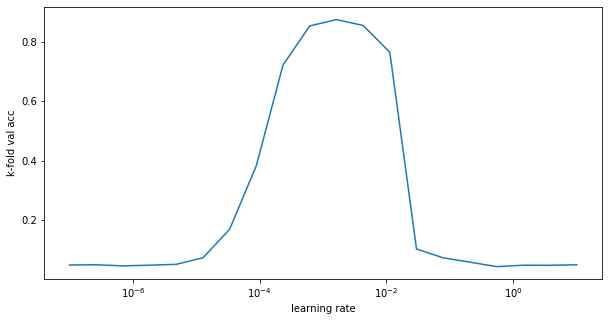

In [23]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel("learning rate")
plt.ylabel("k-fold val acc after 1 epoch")
plt.plot(list(k_fold_accs.keys()), list(k_fold_accs.values()))

In [29]:
best_acc_idx = np.argmax(list(k_fold_accs.values()))
best_acc_idx

9

In [30]:
best_loss_idx = np.argmin(list(k_fold_losses.values()))
best_loss_idx

9

In [2]:
list(models.values())[best_loss_idx][-1].optimizer.lr

NameError: name 'models' is not defined

### That's the best lr!

In [42]:
0.001623776 == 1.623776e-3

True